In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
from pandas import DataFrame
df=DataFrame(data)
print(df.isnull())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                       False  False    False  
1  

In [17]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<Axes: xlabel='Outcome', ylabel='Glucose'>

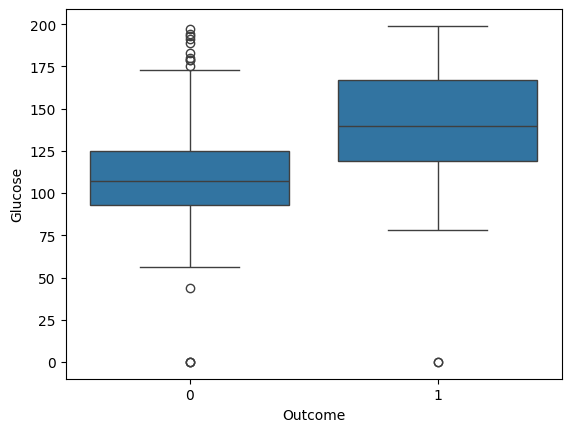

In [27]:
import seaborn as sns
sns.boxplot(x="Outcome",y="Glucose",data=df)

<Axes: xlabel='Outcome', ylabel='BMI'>

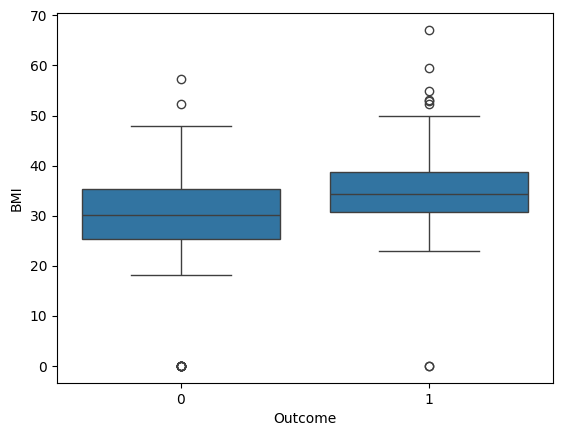

In [19]:
sns.boxplot(x='Outcome', y='BMI', data=df)

<Axes: xlabel='Outcome', ylabel='Age'>

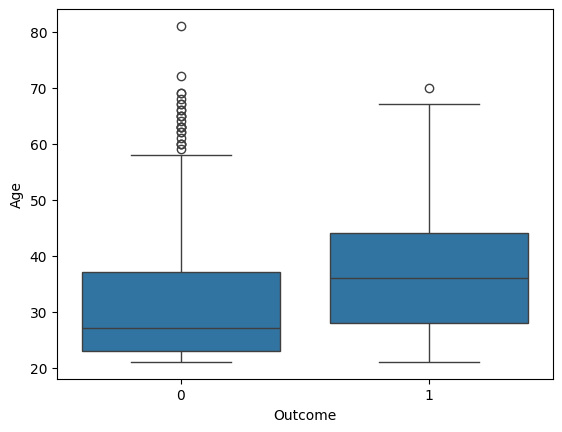

In [20]:
sns.boxplot(x='Outcome', y='Age', data=df)


<Axes: >

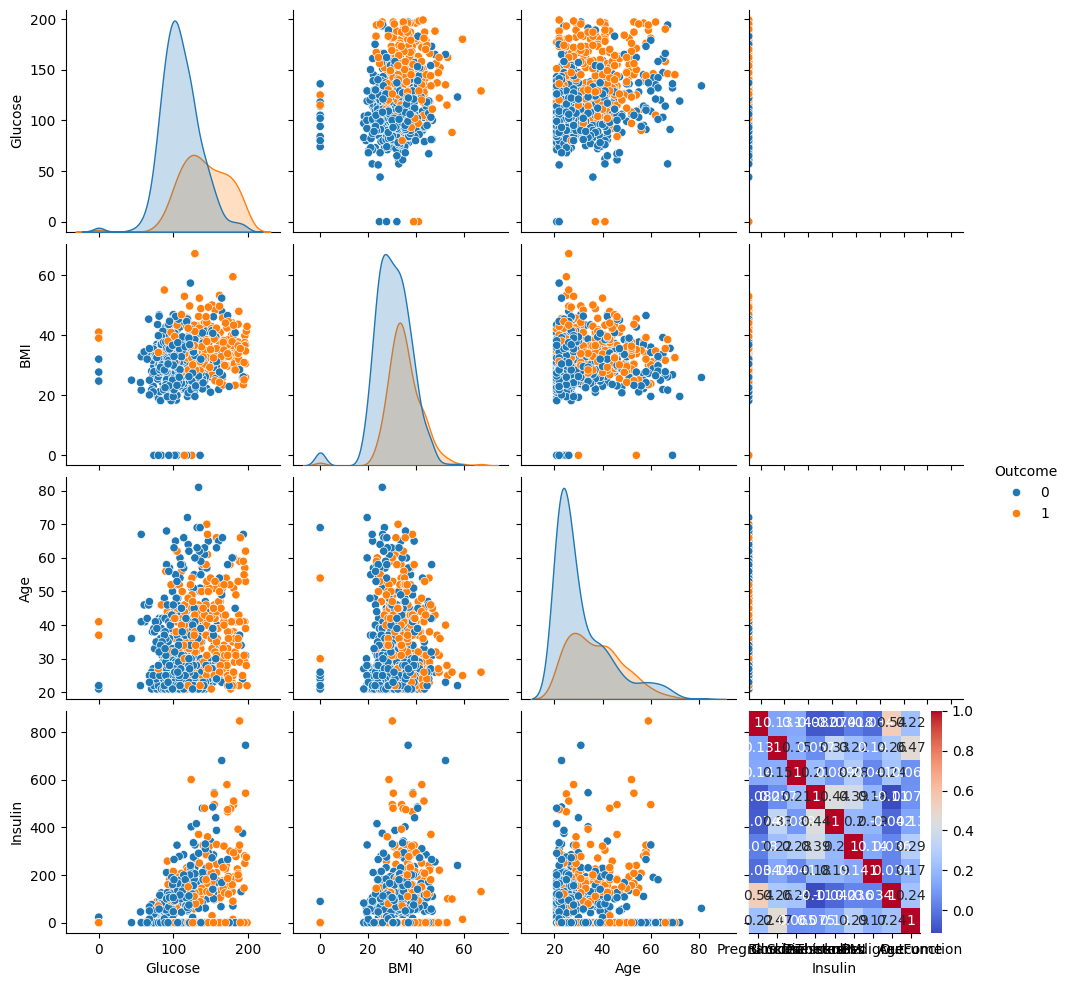

In [21]:

sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome')

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


<Axes: xlabel='Age', ylabel='Count'>

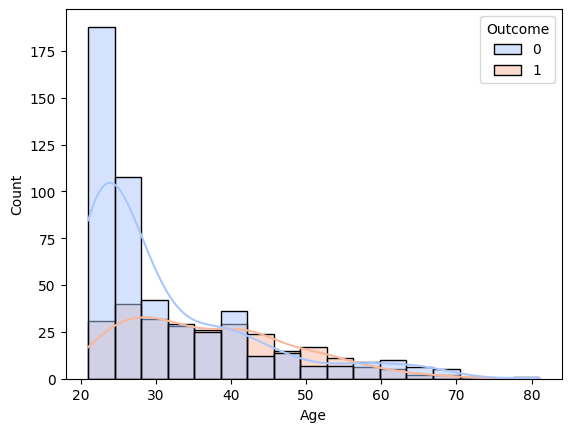

In [32]:
sns.histplot(data=df, x='Age', hue='Outcome', kde=True, palette='coolwarm')

<Axes: xlabel='Glucose', ylabel='Insulin'>

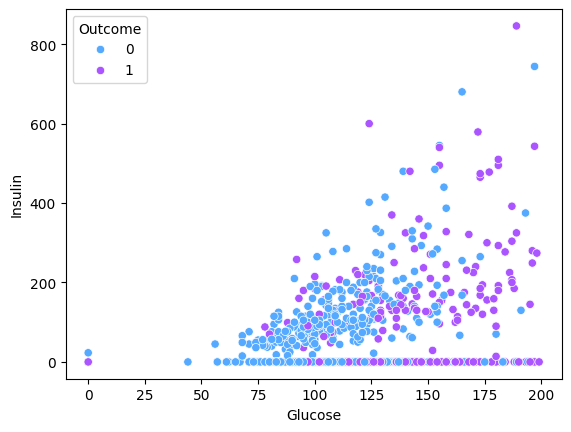

In [33]:
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df, palette='cool')

In [41]:
y=df['Outcome']
X=df.drop('Outcome',axis=1)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (614, 8)
Test set size: (154, 8)


In [47]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7272727272727273
Confusion Matrix:
 [[85 15]
 [27 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154



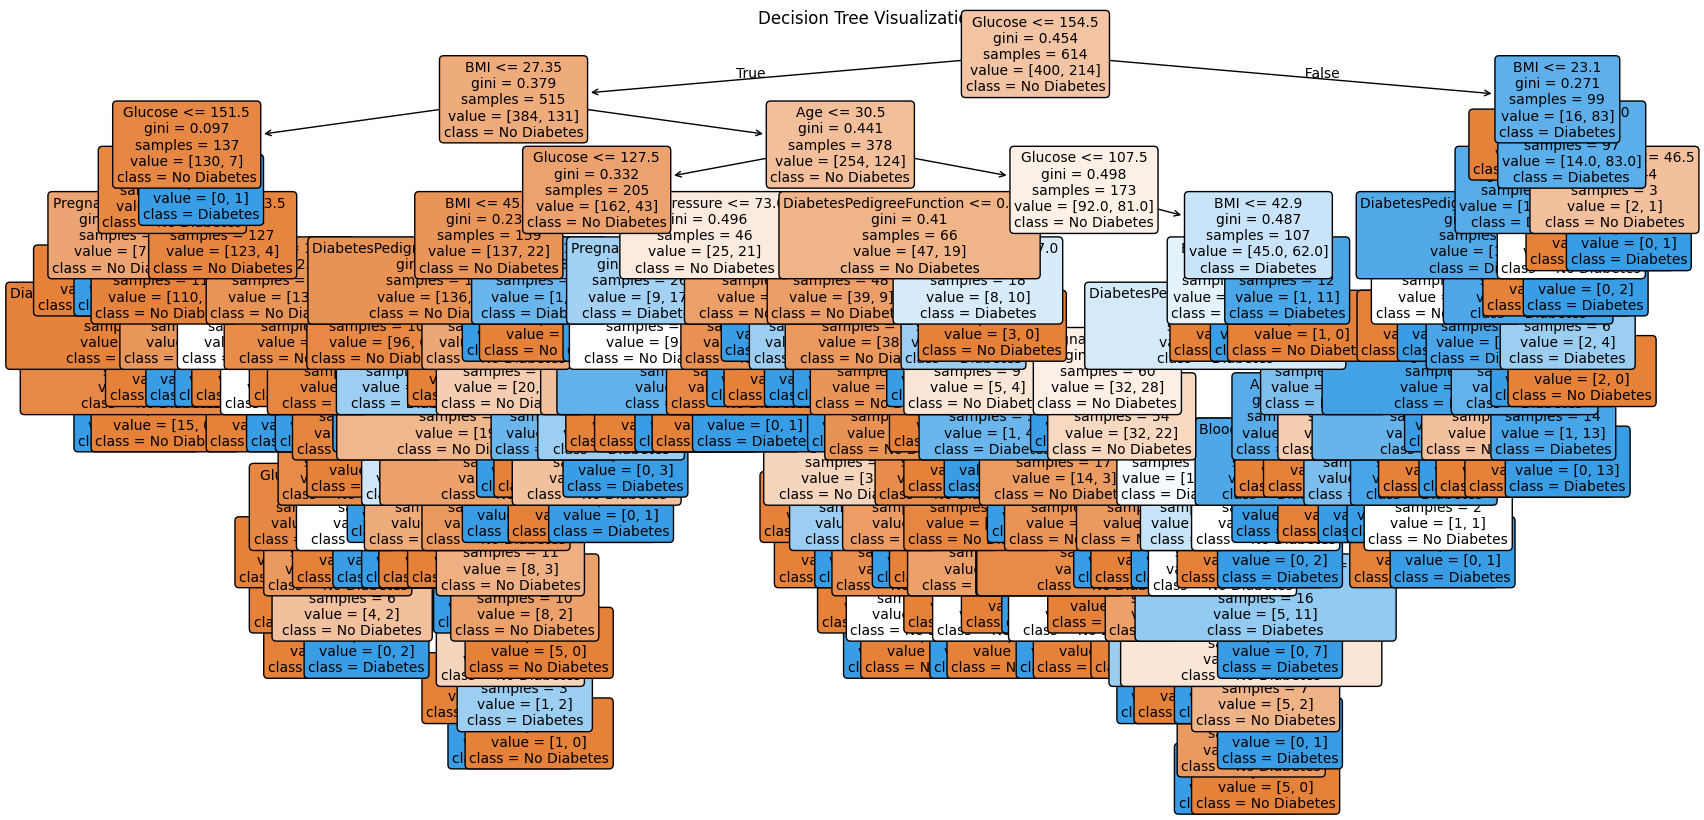

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


In [52]:

model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

model_entropy.fit(X_train, y_train)

y_pred_entropy = model_entropy.predict(X_test)

print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("Classification Report:\n", classification_report(y_test, y_pred_entropy))




Accuracy (Entropy): 0.7012987012987013
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78       100
           1       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



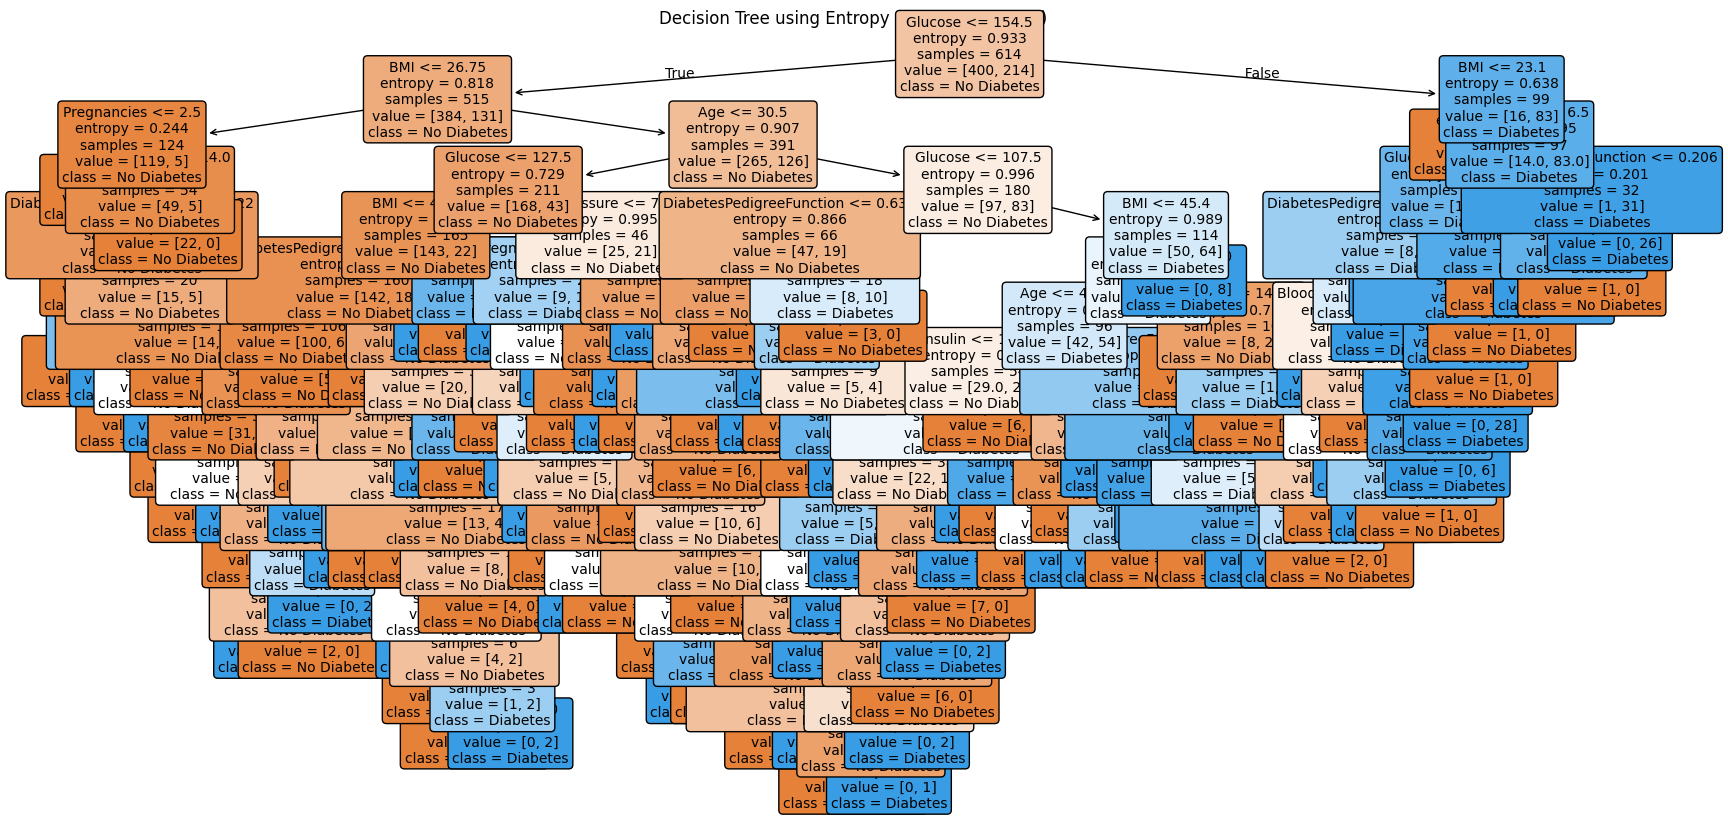

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(model_entropy, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree using Entropy (Information Gain)")
plt.show()


<Figure size 600x400 with 0 Axes>

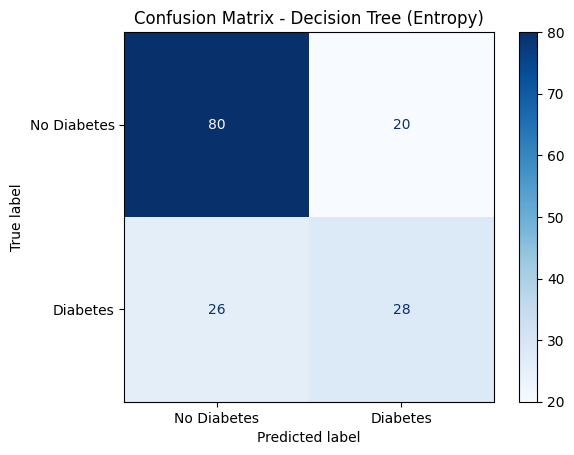

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

y_pred = model_entropy.predict(X_test)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Diabetes", "Diabetes"])

plt.figure(figsize=(6, 4))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix - Decision Tree (Entropy)")
plt.show()


In [56]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=["No Diabetes", "Diabetes"]))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1 Score:  {f1:.2f}")


Classification Report:
               precision    recall  f1-score   support

 No Diabetes       0.75      0.80      0.78       100
    Diabetes       0.58      0.52      0.55        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

Precision: 0.58
Recall:    0.52
F1 Score:  0.55
